In [8]:
from pathlib import Path
from typing import Dict, List, Union, Iterable, Tuple  
import json
import pandas as pd
def load_parquet_dict(data_folder: str) -> dict[str, pd.DataFrame]:
    p = Path(data_folder)
    with open(p / "_dtype_book.json", "r", encoding="utf-8") as f:
        book = json.load(f)

    out = {}
    for fp in sorted(p.glob("*.parquet")):
        if fp.name.startswith("_"):
            continue
        name = fp.stem
        df = pd.read_parquet(fp)
        spec = book.get(name)
        if spec:
            df = df.astype(spec)
        else:
            raise Exception(f"{name} in dtype_book.json is {spec}")
        out[name.lower()] = df
    return out

dfs = load_parquet_dict("data/cleaned_result")
dfs

{'tasks':           TASK_KEY  REVISION    CREATEDBY         TIMECREATED  \
 0              NaN       NaN         None                 NaT   
 1              NaN       NaN         None                 NaT   
 2              NaN       NaN         None                 NaT   
 3              NaN       NaN         None                 NaT   
 4              NaN       NaN         None                 NaT   
 ...            ...       ...          ...                 ...   
 9957666  1656805.0     501.0  Integration 2014-02-06 10:46:12   
 9957667  1536581.0    1306.0  Integration 2012-07-23 09:05:42   
 9957668  1210121.0     457.0  Integration 2012-07-01 20:38:41   
 9957669  1428574.0     367.0  Integration 2014-08-25 15:38:55   
 9957670   569315.0     765.0  Integration 2012-12-12 16:10:14   
 
                MODIFIEDBY        TIMEMODIFIED              CALLID  TASKNUMBER  \
 0                    None                 NaT                None         NaN   
 1                    None       

In [ ]:
## Can Use polars now
# import polars as pl
# pl.Config.set_tbl_cols(-1)
# tasks_df = pl.from_pandas(dfs["tasks"])
# tasks_df.columns

['TASK_KEY',
 'REVISION',
 'CREATEDBY',
 'TIMECREATED',
 'MODIFIEDBY',
 'TIMEMODIFIED',
 'CALLID',
 'TASKNUMBER',
 'EARLYSTART',
 'DUEDATE',
 'LATESTART',
 'PRIORITY',
 'REGION',
 'POSTCODE',
 'OPENDATE',
 'DURATION',
 'NUMBEROFREQUIREDENGINEERS',
 'CRITICAL',
 'APPOINTMENTSTART',
 'APPOINTMENTFINISH',
 'CITY',
 'TASKSTATUSCONTEXT',
 'ISCREWTASK',
 'COUNTRYID',
 'ISSCHEDULED',
 'REQUIREDCREWSIZE',
 'INJEOPARDY',
 'PINNED',
 'JEOPARDYSTATE',
 'DISPLAYSTATUS',
 'BUSINESSUNIT',
 'COMPANY',
 'USEGEOCODE',
 'SEMPRAPREREQUISITESMET',
 'ISLOCKED',
 'SEMPRAEMAILSENT',
 'DISPLAYDATE',
 'SEMPRAINTERRUPTFLAG',
 'SEMPRACIRCUITNUMBER',
 'SEMPRAORDERDESCRIPTION',
 'SEMPRASCHEDULECHANGEREASONCODE',
 'SEMPRAEMERGENCY',
 'SEMPRALOCATIONMAP1',
 'SEMPRALOCATIONMAP2',
 'SEMPRAWORKMGMTMODDATE',
 'SEMPRAFACILITYID',
 'SEMPRASPECIALEQUIPMENTFLAG',
 'SEMPRASUSPENDFLAG',
 'SEMPRAREFERFLAG',
 'SEMPRAMETERBADGENUMBER',
 'SEMPRACPSEQUENCENUMBER',
 'SEMPRACPFACILITYTYPE',
 'SEMPRACOSTCENTER',
 'SEMPRAACCOUNTNUMBER

In [2]:
# if you would like to import the original data, use the following code
# from merge_table import join_csv_by_keywords
# original_dfs, filemap = join_csv_by_keywords(
#     folder="data/click/",
#     given_list={"ASSIGNMENTS": ["ASSIGNMENTS"],
#                 "DEPARTMENT":["DEPARTMENT"],
#                 "DISTRICTs":["DISTRICTS"],
#                 "ENGINEERS":["ENGINEERS"],
#                 "EQUIPMENT":["EQUIPMENT"],
#                 "TASK_STATUSES":["TASK_STATUSES"],
#                 "TASK_TYPES":["TASK_TYPES"],
#                 "TASKS":["TASKS"]
#                 },
                
#     return_filemap=True
# )

In [3]:
pd.set_option('display.max_columns', None)

### - How long does each type of work typically take?

Here’s a recap of what we discussed in our previous meeting.
1. Work Analysis
Duration by Work Type
- How long does each type of work typically take?
Potential System Gaming
- Are there instances where work is completed unusually fast?
- Could crews be performing the work and logging it later, affecting reported duration?
Impact on Actual Duration
- How does this behavior influence the accuracy of recorded durations?
Duration Expectations
- What should be the standard or expected duration for each type of work?
Distribution and Outliers
- What percentage of work falls within the expected duration?
- What do the outliers suggest—are they anomalies, errors, or signs of inefficiency?

Planned vs. Actual Duration
- How closely does actual duration align with what was planned?
2. Scheduling Effectiveness
Crew Scheduling
- Are we assigning work to crews in a balanced and efficient way?
Workload Appropriateness
- Are crews receiving the right amount of work—too much, too little, or just right?
Schedule Feasibility
- Is the schedule realistic and achievable given current resources and constraints?
3. Operational Efficiency
Planned vs. Completed Work
- Does the work completed match what was planned for the day?
Productivity Assessment
- How productive are crews based on completed work versus expectations?
Improvement Opportunities
- Where are the gaps or inefficiencies?
- What changes could improve performance or accuracy?


##### W6TASKS – Work Order/Task data 
##### W6ASSIGNMENTS – Defines what ‘Task’ was scheduled, when and to who.
##### W6DEPARTMENT – Part of hierarchy, We are concerned with ‘SDGE-GAS’
##### W6REGIONS – Part of hierarchy, We are concerned with ‘%-GAS’
##### W6DEPARTMENT – Part of hierarchy, this defines the districts.
##### W6ENGINEERS – Define Crew Shells and People. We normally schedule work to crew shells which are manned by people.
##### W6EQUIPMENT – Defines equipment that is a part of the inspection order, probably not useful for our efforts. 
##### W6TASK_STATUSES – Status codes for orders.
##### W6TASK_TYPES – Work types, defines what the order is concerned with. We are focusing on those where the name contains ‘%SDG’


## Are we assigning work to crews in a balanced and efficient way?

In [4]:
tasks_df = dfs["tasks"]
tasks_df.head()

,PRIMARY_KEY,REVISION,CREATEDBY,TIMECREATED,MODIFIEDBY,TIMEMODIFIED,CALLID,TASKNUMBER,EARLYSTART,DUEDATE,LATESTART,PRIORITY,STATUSID,REGION,DISTRICTID,POSTCODE,OPENDATE,TASKTYPEID,DURATION,NUMBEROFREQUIREDENGINEERS,CRITICAL,APPOINTMENTSTART,APPOINTMENTFINISH,CITY,TASKSTATUSCONTEXT,ISCREWTASK,COUNTRYID,ISSCHEDULED,REQUIREDCREWSIZE,INJEOPARDY,PINNED,JEOPARDYSTATE,DISPLAYSTATUS,BUSINESSUNIT,COMPANY,DEPARTMENTID,USEGEOCODE,SEMPRAPREREQUISITESMET,ISLOCKED,SEMPRAEMAILSENT,DISPLAYDATE,SEMPRAINTERRUPTFLAG,SEMPRACIRCUITNUMBER,SEMPRAORDERDESCRIPTION,SEMPRASCHEDULECHANGEREASONCODE,SEMPRAEMERGENCY,SEMPRALOCATIONMAP1,SEMPRALOCATIONMAP2,SEMPRAWORKMGMTMODDATE,SEMPRAFACILITYID,SEMPRASPECIALEQUIPMENTFLAG,SEMPRASUSPENDFLAG,SEMPRAREFERFLAG,SEMPRAMETERBADGENUMBER,SEMPRACPSEQUENCENUMBER,SEMPRACPFACILITYTYPE,SEMPRACOSTCENTER,SEMPRAACCOUNTNUMBER,SEMPRASCHEDULINGHORIZON,OPTIMIZEONDATE,INTSTATUSNAME,CMGENERALWORKDETAILUPDATERE,CMSPECIALINSTRUCTIONS,CMMATERIALSFLAG,CMPERMITSFLAG,CMATTACHMENTSFLAG,AREAAFFECTED,CMREMARKS,OCRFLAGGING2MAN,DAMAGETYPE03,DAMAGETYPE04,CMVOLUME,DAMAGETYPE01,DAMAGEQTY01,SEMPRACPREAD,ZZNOTUSEDCMODORINTENSITY,OCRGASCREW,OCRHAZMAT,CMCORROSION,OCRTREE,OCRUSAMARKOUT,CMREASONCODE,DAMAGETYPE02,DAMAGEQTY02,DAMAGEQTY03,DAMAGEQTY04,DAMAGEQTY05,CUSTOMERSAFFECTED,ZZNOTUSERCMSUPPORT,OCRENVIRONMENTAL,SEMPRACPCODE,DAMAGETYPE05,CMDESCRIPTION,CMDELIVEREDFLAG,CMREADFLAG,ZSWITCHPLANID,REQUIREDSKILL1,SCHEDULEDSTART,SCHEDULEDFINISH,ONSITETIMESTAMP,COMPLETIONTIMESTAMP,FUNCTLOCREFNBR,SEMPRAUSATICKETNBR,SEMPRAUSATICKETEXPDATE,OCRFLAGGING4MAN,OCRMACHINEDIGGER,OUTAGESTARTDATE,OUTAGEEVENTID,DEVICETYPE,NUMURGENTCUST,DAMAGEDESCRIPTION,CLICKPROJECTCODE,METRICDATE,MAPORDER,DAYSFROMDUEDATE,DUEDATEBUFFER,DAYSESTODD,FL_FUNCTLOCDISP,SEMPRADISPATCHREADY,AMOPTOUT,MTUTRANSFLAG,UPLOADPENDINGFLAG,PREREQDISPLAYLIST,Z_TASKKEY_CHAR,Z_EARLYSTART_DATE,Z_DUE_DATE,Z_SCHEDULEDSTART_DATE,Z_SCHEDULEDFINISH_DATE,Z_TIMECREATED_DATE,Z_COMPLETION_DATE,REVISION_STATUS,STATUS,USEDINMOBILE,REVISION_TASKTYPE,TASKTYPE,DURATION_TASKTYPE,TASKREVENUE,TIMEUNIT,COSTPERTIMEUNIT,PRIORITY_TASKTYPE,NUMBEROFREQUIREDENGINEERS_TASKTYPE,ISCREWTASK_TASKTYPE,SEMPRAINTERRUPTFLAG_TASKTYPE,REQUIREDCREWSIZE_TASKTYPE,PRIORITYCODEDEPT,COMPANY_TASKTYPE,Z_ORDER_TYPE_CATEGORY,REVISION_DISTRICT,DISTRICT,REGIONPARENT,SAMESITETIMERADIUS,SAMESITEDISTANCERADIUS,CITY_DISTRICT,POSTCODE_DISTRICT,COMPANY_DISTRICT,USEDINMOBILE_DISTRICT,DATAPREPARATIONAMOUNT,Z_DISTRICT_ABBR,Z_DISTRICT_NAME,Z_DISTRICT_CATEGORY,REVISION_DEPARTMENT,DEPARTMENT
0,4931378,275,Integration,2022-11-25 17:26:18,NETWORK SERVICE,2023-01-15 21:37:00,SAP-PM510000915794,10,2023-01-01,2023-10-31 23:59:00,2023-10-31 23:29:00,3,124131328.0,17.0,133.0,<NA>,2022-11-25 17:26:00,1602.0,1800.0,1.0,0.0,NaT,NaT,<NA>,0.0,-1,126097408.0,-1,2.0,0,0,<NA>,63.0,126627840.0,1197748225.0,126763010.0,0.0,-1,0,0.0,2023-01-16 21:37:00,0,<NA>,SUBSURFACE 10Y-4 CAMERON,<NA>,0.0,TB-1318-B7,AT-18060-118390,2022-11-25,H121512,0,0,0,<NA>,<NA>,<NA>,2100-0108,<NA>,304.0,NaT,<NA>,<NA>,<NA>,0,0,0,<NA>,<NA>,0,<NA>,<NA>,0.0,<NA>,<NA>,100.0,0.0,0.0,0,0.0,0,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0.0,0.0,0,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,2023-01-06 11:13:00,2023-01-06 11:43:00,2023-01-06 09:09:00,2023-01-06 10:18:00,ED.MTE.CMRN.L111.S101,<NA>,NaT,0.0,0,NaT,<NA>,<NA>,<NA>,<NA>,MI,2023-01-06 11:13:00,1540.0,NaT,2023-09-16 09:35:00,303.0,ED.MTE.CMRN.L111.S101,0,0,<NA>,0,<NA>,4931378,2023-01-01,2023-10-31,2023-01-06,2023-01-06,2022-11-25,2023-01-06,62.0,COMPLETED,-1.0,20.0,SS10 INSPECTION SDE,1800.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,ED,NaN,UG INSPECT,15.0,MOUNTAIN EMPIRE-ELECTRIC,17.0,0.0,0.0,Pine Valley,91962,1.197748e+09,-1.0,0.0,ME,MOUNTAIN EMPIRE,Active Electric,2.0,SDGE-ELECTRIC
1,4330696,297,Integration,2021-11-25 05:51:27,NETWORK SERVICE,2022-04-08 21:55:24,SAP-PM510000845290,10,2022-01-01,2022-10-31 23:59:00,2022-10-31 23:29:00,3,124131328.0,14.0,139.0,<NA>,2021-11-25 05:51:00,1602.0,1800.0,1.0,0.0,NaT,NaT,<NA>,0.0,-1,126097408.0,-1,2.0,0,0,<NA>,63.0,126627840.0,1197748225.0,126763010.0,0.0,-1,

DURATION: dropped 299365 rows (5.53%) outside [-11700.000, 24300.000]


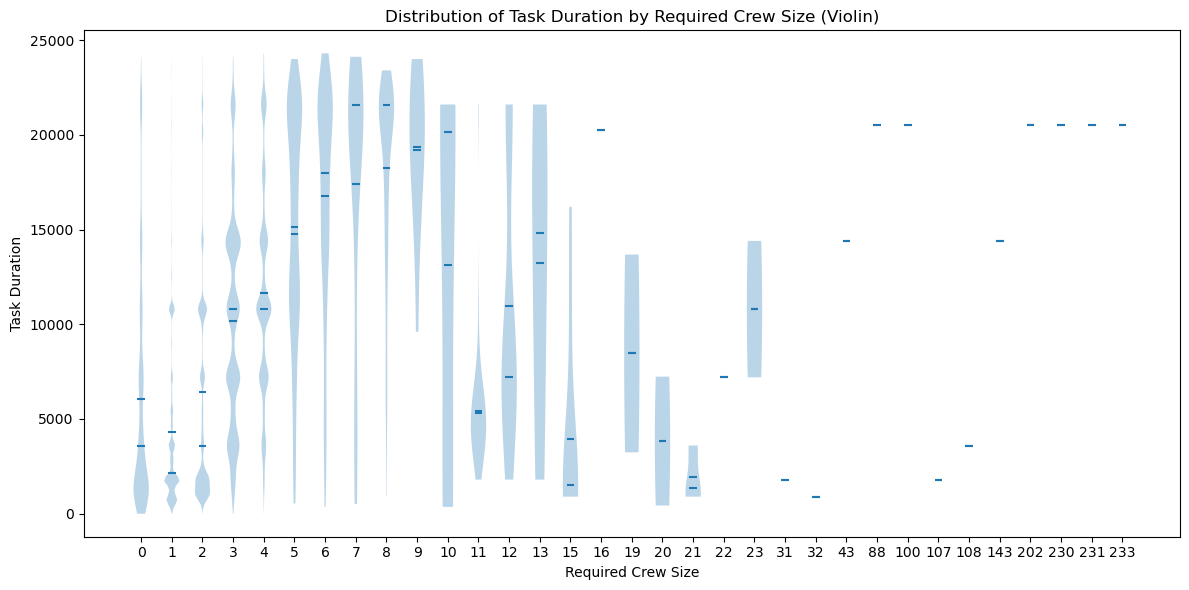

In [58]:
tasks_df.TASKNUMBER  = tasks_df.TASKNUMBER.astype(float)
def drop_outliers_iqr(df: pd.DataFrame, column: str, iqr_k: float = 1.5):
    """
    丢掉单列中超出 [Q1 - k*IQR, Q3 + k*IQR] 的行。
    """
    s = df[column].astype(float)  # 保底转成数值
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - iqr_k * iqr, q3 + iqr_k * iqr
    mask = s.between(lower, upper, inclusive="both")
    dropped = (~mask).sum()
    print(f"{column}: dropped {dropped} rows ({dropped/len(df):.2%}) "
          f"outside [{lower:.3f}, {upper:.3f}]")
    return df.loc[mask].copy()

# 示例：
tasks_df_filter = drop_outliers_iqr(tasks_df[["DURATION","REQUIREDCREWSIZE"]], "DURATION", iqr_k=1.5)
tasks_df_filter.groupby("REQUIREDCREWSIZE").mean()
import numpy as np
import matplotlib.pyplot as plt

# 假设你已有：tasks_df_filter（已做 IQR 去极值）
# 只保留必要列并清理
dfv = tasks_df_filter[["REQUIREDCREWSIZE", "DURATION"]].dropna().copy()
dfv["REQUIREDCREWSIZE"] = dfv["REQUIREDCREWSIZE"].astype(int)

# 设定顺序（按人数升序）
sizes = sorted(dfv["REQUIREDCREWSIZE"].unique())

# 按组收集数据：每个 size 对应一列 DURATION 的样本
data = [dfv.loc[dfv["REQUIREDCREWSIZE"] == k, "DURATION"].to_numpy() for k in sizes]

# 画 violin（均值/中位数都给你标上）
fig, ax = plt.subplots(figsize=(12, 6))
vp = ax.violinplot(
    data,
    positions=np.arange(1, len(sizes) + 1),
    showmeans=True,
    showmedians=True,
    showextrema=False
)

# 轴与刻度
ax.set_xticks(np.arange(1, len(sizes) + 1))
ax.set_xticklabels([str(k) for k in sizes])
ax.set_xlabel("Required Crew Size")
ax.set_ylabel("Task Duration")
ax.set_title("Distribution of Task Duration by Required Crew Size (Violin)")

# 可选：如果尺度跨度很大，打开对数轴更容易看清
# ax.set_yscale("log")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设你的表是 df，列名正如你贴的：["DURATION", "REQUIREDCREWSIZE"]
# 多数人其实是把左列当 x，右列当 y；更合理的是 x=REQUIREDCREWSIZE, y=DURATION
df = df.rename(columns={"DURATION": "REQUIREDCREWSIZE", "REQUIREDCREWSIZE": "DURATION"}).copy()

# 类型与清洗
df["REQUIREDCREWSIZE"] = pd.to_numeric(df["REQUIREDCREWSIZE"], errors="coerce")
df["DURATION"]         = pd.to_numeric(df["DURATION"], errors="coerce")
df = df.dropna(subset=["REQUIREDCREWSIZE", "DURATION"])
df = df.sort_values("REQUIREDCREWSIZE")  # x 轴按人数升序

# 1) 柱状图
plt.figure(figsize=(10,5))
plt.bar(df["REQUIREDCREWSIZE"].astype(int), df["DURATION"])
plt.title("Total Duration by Required Crew Size")
plt.xlabel("Required Crew Size")
plt.ylabel("Duration")
plt.xticks(df["REQUIREDCREWSIZE"].astype(int))  # 人数通常是整数
plt.tight_layout()
plt.show()

# 2) 折线图（看趋势/边际变化）
plt.figure(figsize=(10,5))
plt.plot(df["REQUIREDCREWSIZE"], df["DURATION"], marker="o")
plt.title("Duration vs Required Crew Size (Trend)")
plt.xlabel("Required Crew Size")
plt.ylabel("Duration")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3) y 轴取对数（如果右边几个值把图压扁了）
plt.figure(figsize=(10,5))
plt.bar(df["REQUIREDCREWSIZE"].astype(int), df["DURATION"])
plt.yscale("log")
plt.title("Total Duration by Crew Size (Log Scale)")
plt.xlabel("Required Crew Size")
plt.ylabel("Duration (log scale)")
plt.xticks(df["REQUIREDCREWSIZE"].astype(int))
plt.tight_layout()
plt.show()


In [5]:
crew_cols = [c for c in tasks_df.columns if "CREW" in c.upper()]
print(crew_cols)

['ISCREWTASK', 'REQUIREDCREWSIZE', 'OCRGASCREW', 'ISCREWTASK_TASKTYPE', 'REQUIREDCREWSIZE_TASKTYPE']


In [ ]:
tasks_df["BUSINESSUNIT"]

0           126627840.0
1           126627840.0
2           126627840.0
3           126627840.0
4           126627840.0
               ...     
5408936    1166016514.0
5408937    1166016514.0
5408938    1166016514.0
5408939    1166016514.0
5408940    1166016514.0
Name: BUSINESSUNIT, Length: 5408941, dtype: string

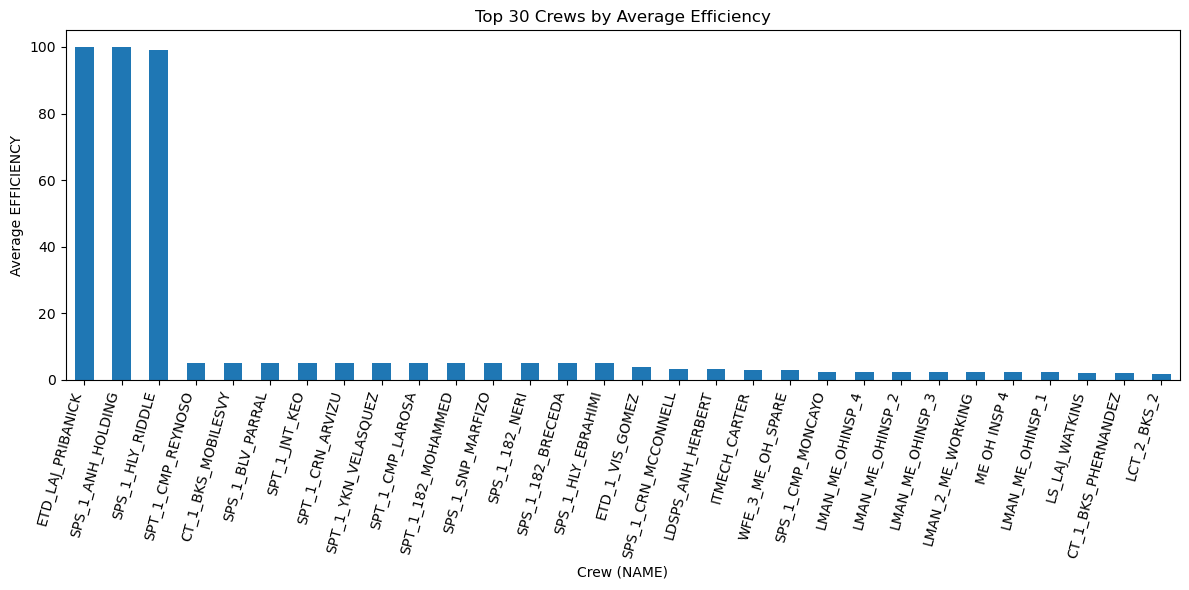

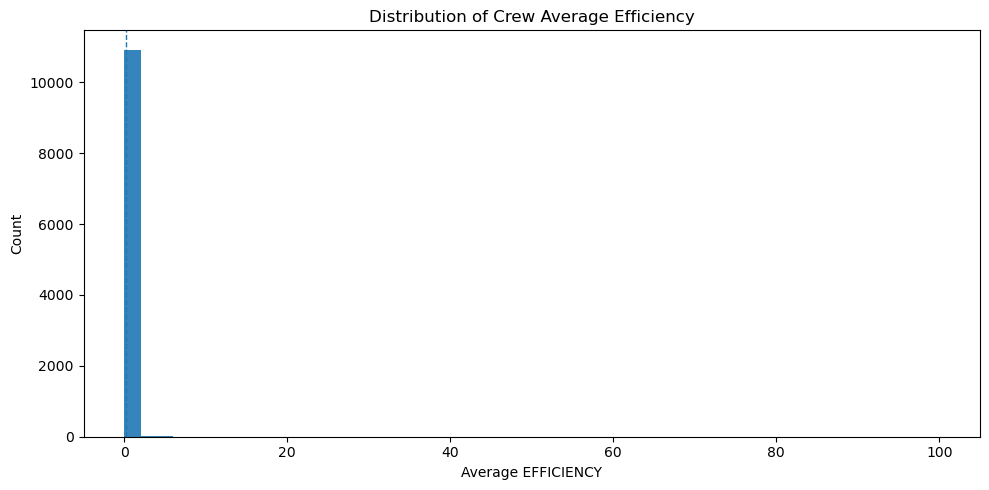

Bottom 10 crews by average efficiency:


,EFFICIENCY
NAME,
SAUCEDO DANIEL,0.0
BARCENA ALAN,0.0
BARCENAS JOSEPH,0.0
BARCENAS MICHAEL,0.0
BARKIN JESSE,0.0
BARNA THOMAS,0.0
BARNES LEW,0.0
BARNETT BRYAN,0.0
BARNEY GARY,0.0


In [7]:
assignments_df = dfs["assignments"]
efficiency_df = assignments_df[["EFFICIENCY","NAME"]].groupby("NAME").mean().sort_values("EFFICIENCY",ascending=False)
import matplotlib.pyplot as plt
import numpy as np

eff = efficiency_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["EFFICIENCY"]).copy()

# —— 图1：Top-N 班组效率条形图 ——
TOP_N = 30
top_eff = eff.sort_values("EFFICIENCY", ascending=False).head(TOP_N)

plt.figure(figsize=(12, 6))
top_eff["EFFICIENCY"].plot(kind="bar")
plt.title(f"Top {TOP_N} Crews by Average Efficiency")
plt.xlabel("Crew (NAME)")
plt.ylabel("Average EFFICIENCY")
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()

# —— 图2：全体效率分布 ——
plt.figure(figsize=(10, 5))
vals = eff["EFFICIENCY"].to_numpy()
plt.hist(vals, bins=50, alpha=0.9)
plt.axvline(np.nanmean(vals), linestyle="--", linewidth=1)
plt.title("Distribution of Crew Average Efficiency")
plt.xlabel("Average EFFICIENCY")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

bottom_eff = eff.sort_values("EFFICIENCY", ascending=True).head(10)
print("Bottom 10 crews by average efficiency:")
display(bottom_eff)


In [9]:
assignments_df[["COMPANY","NAME"]].groupby("NAME").describe()

COMPANY                          
                 count unique           top freq
NAME                                            
                     1      1  1197748225.0    1
                     1      1  1197748224.0    1
                     2      1  1197748224.0    2
    MOORE MARK       3      1  1197748224.0    3
 9                   2      1  1197748224.0    2
...                ...    ...           ...  ...
_WFOH_EA_PRI_3       1      1  1197748225.0    1
_WFOH_EA_XTRA        1      1  1197748225.0    1
_WFUG_EA_PRI_1       1      1  1197748225.0    1
_WFUG_EA_PRI_2       2      1  1197748225.0    2
_WFUG_EA_XTRA        1      1  1197748225.0    1

[10952 rows x 4 columns]

In [25]:
assignments_df["TASK"].astype(float)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
7775394   NaN
7775395   NaN
7775396   NaN
7775397   NaN
7775398   NaN
Name: TASK, Length: 7775399, dtype: float64